In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical
from tensorflow.keras import datasets
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

In [ ]:
(X_train,Y_train),(X_test,Y_test) = datasets.mnist.load_data()
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


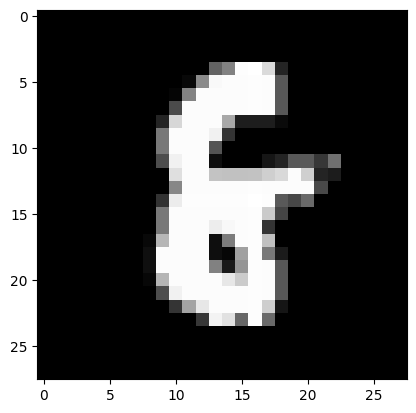

8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  99 130 253 255 218
   37   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   8 139 249 252 252 253 252
   88   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   5 131 252 252 252 252 253 252
   88   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  75 252 252 252 252 252 253 252
   88   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  36 215 252 252 252 168 

In [ ]:
my_sample = np.random.randint(60000)
plt.imshow(X_train[my_sample],cmap='gray')
plt.show()
print(Y_train[my_sample])
print(X_train[my_sample])

In [ ]:
y_train = to_categorical(Y_train)   #onehotencoding
y_test = to_categorical(Y_test)
print(Y_train[5000])
print(y_train[5000])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
x_train = X_train.reshape(-1,28 * 28)
x_test = X_test.reshape(-1,28* 28)
X_train = x_train / 255
x_test = x_test /255
print(x_train.shape)

(60000, 784)


In [ ]:
model = Sequential()
model.add(Dense(128,input_dim=784,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
opt = Adam(learning_rate=0.01)
model.compile(opt,loss='categorical_crossentropy',
              metrics=['accuracy'])
fit_hist=model.fit(x_train,y_train,batch_size=256,epochs=15,validation_split=0.2,verbose=1)

Epoch 1/15
188/188 [==============================] - 3s 9ms/step - loss: 11.3948 - accuracy: 0.7465 - val_loss: 0.5169 - val_accuracy: 0.8607
Epoch 2/15
188/188 [==============================] - 1s 8ms/step - loss: 0.4240 - accuracy: 0.8796 - val_loss: 0.3644 - val_accuracy: 0.8927
Epoch 3/15
188/188 [==============================] - 2s 12ms/step - loss: 0.3239 - accuracy: 0.9070 - val_loss: 0.2871 - val_accuracy: 0.9160
Epoch 4/15
188/188 [==============================] - 2s 9ms/step - loss: 0.2709 - accuracy: 0.9229 - val_loss: 0.2647 - val_accuracy: 0.9279
Epoch 5/15
188/188 [==============================] - 1s 7ms/step - loss: 0.2466 - accuracy: 0.9304 - val_loss: 0.2718 - val_accuracy: 0.9274
Epoch 6/15
188/188 [==============================] - 1s 8ms/step - loss: 0.2302 - accuracy: 0.9358 - val_loss: 0.2404 - val_accuracy: 0.9374
Epoch 7/15
188/188 [==============================] - 1s 7ms/step - loss: 0.2097 - accuracy: 0.9414 - val_loss: 0.2575 - val_accuracy: 0.9287
Epoc

In [ ]:
score = model.evaluate(x_test,y_test,verbose=0)
print('accuracy',score[1])

accuracy 0.08919999748468399


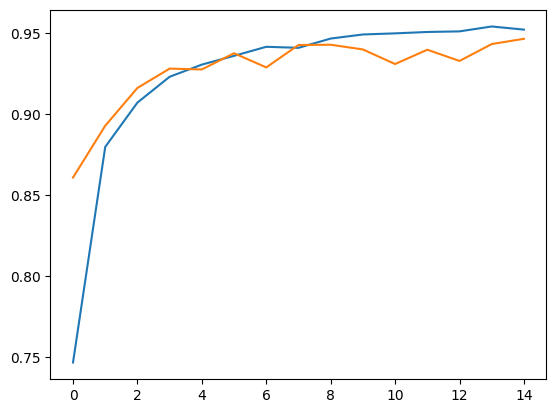

In [ ]:
plt.plot(fit_hist.history['accuracy'])
plt.plot(fit_hist.history['val_accuracy'])
plt.show()

6
1/1 [==============================] - 0s 19ms/step
[[0.13179952 0.04083393 0.04986797 0.01984686 0.05456404 0.37806717
  0.07915097 0.09958056 0.06001277 0.08627619]]
5


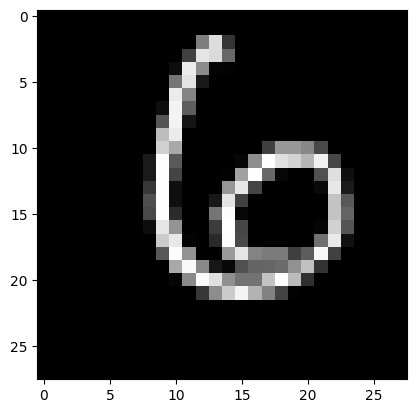

In [ ]:
my_sample=np.random.randint(10000)
plt.imshow(X_test[my_sample],cmap='gray')
print(Y_test[my_sample])
pred = model.predict(x_test[my_sample].reshape(-1,784))
print(pred)
print(np.argmax(pred))